Link:
    
    https://en.wikipedia.org/wiki/Finite_difference_method

\$
{
 \displaystyle 
 {\begin{cases}
 U_{t}=\alpha \Delta U \\
 U(x, 0, t) = U(0, y, t) = U(1, y, t) = 0 & {\text{(boundary condition)}} \\
 U(x, 1, t) = 100 & {\text{(boundary condition)}} \\
 U(D, 0)=U_{0}(x, y) & {\text{(initial condition)}}
 \end{cases}}
}
\$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from ipywidgets import HTML

In [14]:
from matplotlib.animation import FuncAnimation

In [15]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Explicit method

## Params:

In [16]:
plate_length = 1.0
max_time_iters = 100000
alpha = 2.0
dx = 1.0e-2

In [18]:
parameters = {
    'grid size': nx, 
    'time step': dt, 
    'gamma': gamma, 
    'total time': dt * max_time_iters,
}

for label in parameters.keys():
    print(f"{label:12} : {parameters[label]}")

grid size    : 100
time step    : 1.25e-05
gamma        : 0.25
total time   : 1.25


## Simulation:

In [22]:
dt = dx * dx / (4.0 * alpha)
nx = (int)(plate_length / dx) 

hx = (1.0 / (dx))
hx2 = (1.0 / (dx * dx))
ht = (1.0 / dt)

In [32]:
def derivative_x(u):
    return hx * (u[k, 1:, 1:-1] - u[k, :-1, 1:-1])

def derivative_y(u):
    return hx * (u[k, 1:-1, 1:] - u[k, 1:-1, :-1])

In [37]:
x = np.linspace(0.0, 1.0, 100)

y = x
dy = (y[1:] - y[:-1]) / (x[1] - x[0])

dy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
def laplacian(u):
    return hx2 * (u[k, 2:, 1:-1] + u[k, :-2, 1:-1] + u[k, 1:-1, 2:] + u[k, 1:-1, :-2] - (4.0 * u[k, 1:-1, 1:-1]))

In [24]:
# initial conditions:
u0 = np.zeros((max_time_iters, nx, nx))
u0.fill(0.0)

# boundary conditions:
# tod:
u0[:, -1:, :] = 100.0
# left
u0[:, :, :1] = 0.0
# bottom
u0[:, :1, 1:] = 0.0
# right
u0[:, :, -1:] = 0.0

# solve the problem:
u = u0.copy()
for k in range(max_time_iters - 1):
    u[k+1, 1:-1, 1:-1] = (dt * alpha * laplacian(u)) + u[k, 1:-1, 1:-1]

In [25]:
skipFrame = 1000
uRender = u[::skipFrame,:,:]

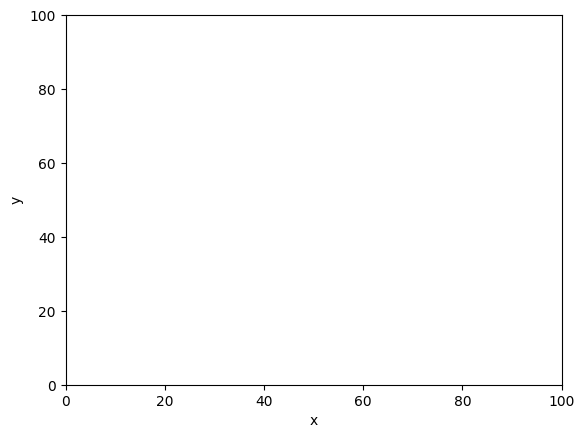

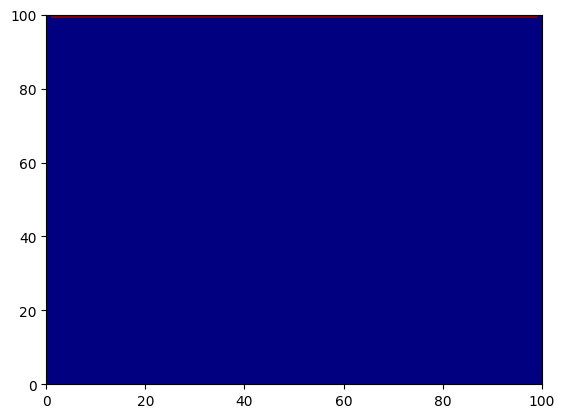

In [26]:
fig = plt.figure()
ax = plt.axes(xlim=(0.0, nx), 
              ylim=(0.0, nx))

skipFrame = 1000
ax.set_xlabel("x")
ax.set_ylabel("y")


fig  = plt.figure()
ax   = plt.subplot(111)
fond = ax.pcolormesh(uRender[0], cmap=plt.cm.jet, vmin=0, vmax=nx)

def animate(t):
    print(t, end='\r')
    ax.cla()
    fond = ax.pcolormesh(uRender[t], cmap=plt.cm.jet, vmin=0, vmax=nx)
    return fond,

eq_anim = FuncAnimation(fig, animate, frames=uRender.shape[0])

In [27]:
eq_video = eq_anim.to_html5_video()

In [28]:
HTML(eq_video)

HTML(value='<video width="640" height="480" controls autoplay loop>\n  <source type="video/mp4" src="data:vide…

In [29]:
eq_anim.save('eq_anim.gif', writer='pillow', fps=60)

In [30]:
plt.close()